<a href="https://colab.research.google.com/github/AgiuG/Modelos_de_Regress-o/blob/main/Todos_os_meses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dados_com_data.csv to dados_com_data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dados_com_data.csv']))
df.head()

,Date,Sales,Populacao,ano,mês
0,1992-01-01,6938,256.9,0,1
1,1992-02-01,7524,256.9,0,2
2,1992-03-01,8475,256.9,0,3
3,1992-04-01,9401,256.9,0,4
4,1992-05-01,9558,256.9,0,5


In [ ]:
df

,Date,Sales,Populacao,ano,mês
0,1992-01-01,6938,256.9,0,1
1,1992-02-01,7524,256.9,0,2
2,1992-03-01,8475,256.9,0,3
3,1992-04-01,9401,256.9,0,4
4,1992-05-01,9558,256.9,0,5
...,...,...,...,...,...
334,2019-11-01,24928,328.2,27,11
335,2019-12-01,34541,328.2,27,12
336,2020-01-01,16612,333.5,28,1
337,2020-02-01,18813,333.5,28,2


In [ ]:
df.describe()

,Sales,Populacao,ano,mês
count,339.000000,339.000000,339.000000,339.000000
mean,16392.126844,296.137168,13.631268,6.457227
std,5445.017138,21.869993,8.169236,3.468425
min,6938.000000,256.900000,0.000000,1.000000
25%,12317.000000,279.300000,7.000000,3.000000
50%,15882.000000,298.400000,14.000000,6.000000
75%,19841.500000,316.100000,21.000000,9.000000
max,34611.000000,333.500000,28.000000,12.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


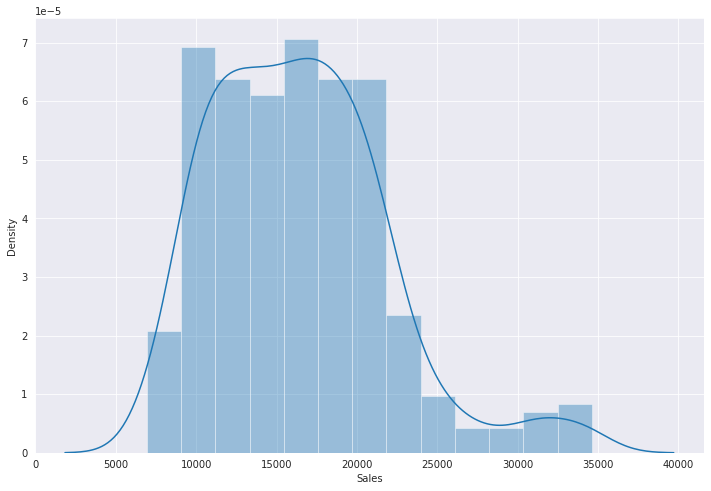

In [ ]:
plt.figure(figsize=(12,8))
sns.set_style('darkgrid')
sns.distplot(df.Sales)

In [ ]:
df.corr()

,Sales,Populacao,ano,mês
Sales,1.000000,0.712132,0.712322,0.473142
Populacao,0.712132,1.000000,0.997832,-0.018521
ano,0.712322,0.997832,1.000000,-0.018570
mês,0.473142,-0.018521,-0.018570,1.000000


In [ ]:
correlations = df.corr()
correlations['Sales']

Sales        1.000000
Populacao    0.712132
ano          0.712322
mês          0.473142
Name: Sales, dtype: float64

In [ ]:
columns = df.columns.drop(['Sales', 'Date'])
columns

Index(['Populacao', 'ano', 'mês'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df[columns],df['Sales'], test_size=0.20, random_state=42)

In [ ]:
lr = LinearRegression()

In [ ]:
model = lr.fit(X_train,y_train)

#Realizando a predição
resultado = model.predict(X_test)

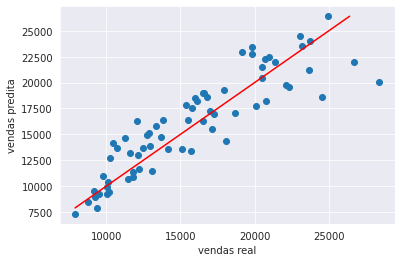

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado)
range = [y_test.min(), resultado.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
mean_squared_error(y_test, resultado)

5359326.133595864

In [ ]:
model.score(X_test,y_test)

0.7872188974876657

In [ ]:
resultado_treino = model.predict(X_train)
mean_squared_error(y_train, resultado_treino)

8130582.100802992

In [ ]:
model.score(X_train,y_train)

0.733995360829942

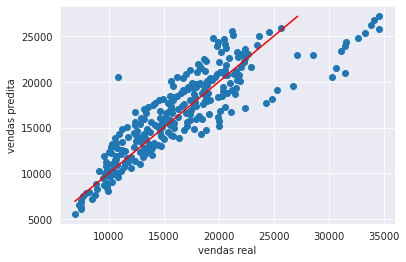

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_train, resultado_treino)
range = [y_train.min(), resultado_treino.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
tree = DecisionTreeRegressor()

In [ ]:
model_tree = tree.fit(X_train,y_train)
resultado_tree = tree.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado_tree)

801448.3088235294

In [ ]:
model_tree.score(X_test,y_test)

0.9681801311382974

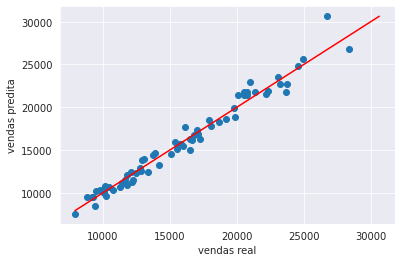

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado_tree)
range = [y_test.min(), resultado_tree.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
tree_rf = RandomForestRegressor()

In [ ]:
model_rf = tree_rf.fit(X_train, y_train)
resultado_rf = model_rf.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado_rf)

527412.7694191178

In [ ]:
model_rf.score(X_test,y_test)

0.9790601527582746

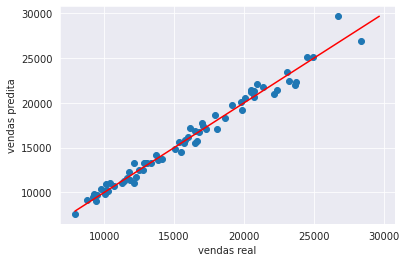

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado_rf)
range = [y_test.min(), resultado_rf.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parametros = {'min_samples_leaf':[1,10],'min_samples_split':[2,10],'n_estimators':[100,250,500,750]}

In [ ]:
rf = RandomForestRegressor()
grid = GridSearchCV(rf, parametros)

In [ ]:
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n

In [ ]:
grid.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}

In [ ]:
rf_best = grid.best_estimator_

In [ ]:
resultado_final = rf_best.predict(X_test)

In [ ]:
mean_squared_error(y_test, resultado_final)

492873.6180155295

In [ ]:
rf_best.score(X_test,y_test)

0.9804314592494818

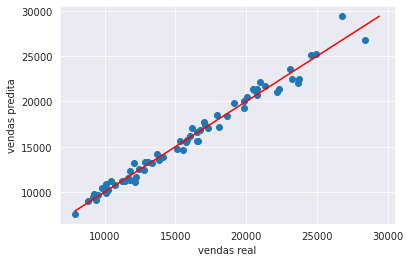

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(y_test, resultado_final)
range = [y_test.min(), resultado_final.max()]
plt.plot(range, range, 'red')
plt.xlabel('vendas real')
plt.ylabel('vendas predita')
plt.show()